<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/Isaac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [3]:
!ls

Angie.ipynb  Harris.ipynb  Samuel.ipynb   Timothy.ipynb
desktop.ini  Isaac.ipynb   Test_data.csv  Train_data.csv


## Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# Smote
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
from imblearn.combine import SMOTEENN, SMOTETomek

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# DT
from sklearn.tree import DecisionTreeClassifier
# kNN
from sklearn.neighbors import KNeighborsClassifier
# RF
from sklearn.ensemble import RandomForestClassifier
# SVM
from sklearn.svm import SVC
# NN (FNN - Binary classification)
import tensorflow as tf
from keras.layers import Dense, Dropout

# Intrusion Dataset

In [5]:
intrusion_data =pd.read_csv('Train_data.csv')
intrusion_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


# Preprocessing

In [6]:
total_rows = len(intrusion_data)

missing_values = intrusion_data.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

#Attribute Analyses and Input selection

In [10]:
intrusion_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
intrusion_data = pd.read_csv('Train_data.csv')

In [24]:
intrusion_data_right = intrusion_data
intrusion_data_right['anomolous_behaviour'] = (intrusion_data_right['class'] == 'anomaly').astype(int)
intrusion_data_right = intrusion_data_right.drop(['class'], axis=1)
intrusion_data_right

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label,anomolous_behaviour
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,1
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,1
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1,1
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,1
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,1


In [25]:
int_data_no_strings = intrusion_data_right.select_dtypes(exclude=['object'])
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label,anomolous_behaviour
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,1
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,1
25188,0,334,0,0,0,0,0,0,1,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1,1
25189,0,0,0,0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,1
25190,0,0,0,0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,1


In [38]:
from sklearn.feature_selection import mutual_info_classif

X = int_data_no_strings.drop('class_label', axis=1)
y = int_data_no_strings['class_label']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

anomolous_behaviour       0.694465
src_bytes                 0.565363
dst_bytes                 0.435019
diff_srv_rate             0.359370
same_srv_rate             0.359335
dst_host_srv_count        0.329340
dst_host_same_srv_rate    0.306277
dst_host_diff_srv_rate    0.288037
logged_in                 0.283484
dst_host_serror_rate      0.280519
dtype: float64


In [39]:
int_corr = intrusion_data[['src_bytes','dst_bytes','diff_srv_rate','same_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','logged_in','dst_host_serror_rate','dst_host_srv_serror_rate', 'class_label']]

In [40]:
intrusion_data_right['class_label'].value_counts()

0    13449
1    11743
Name: class_label, dtype: int64

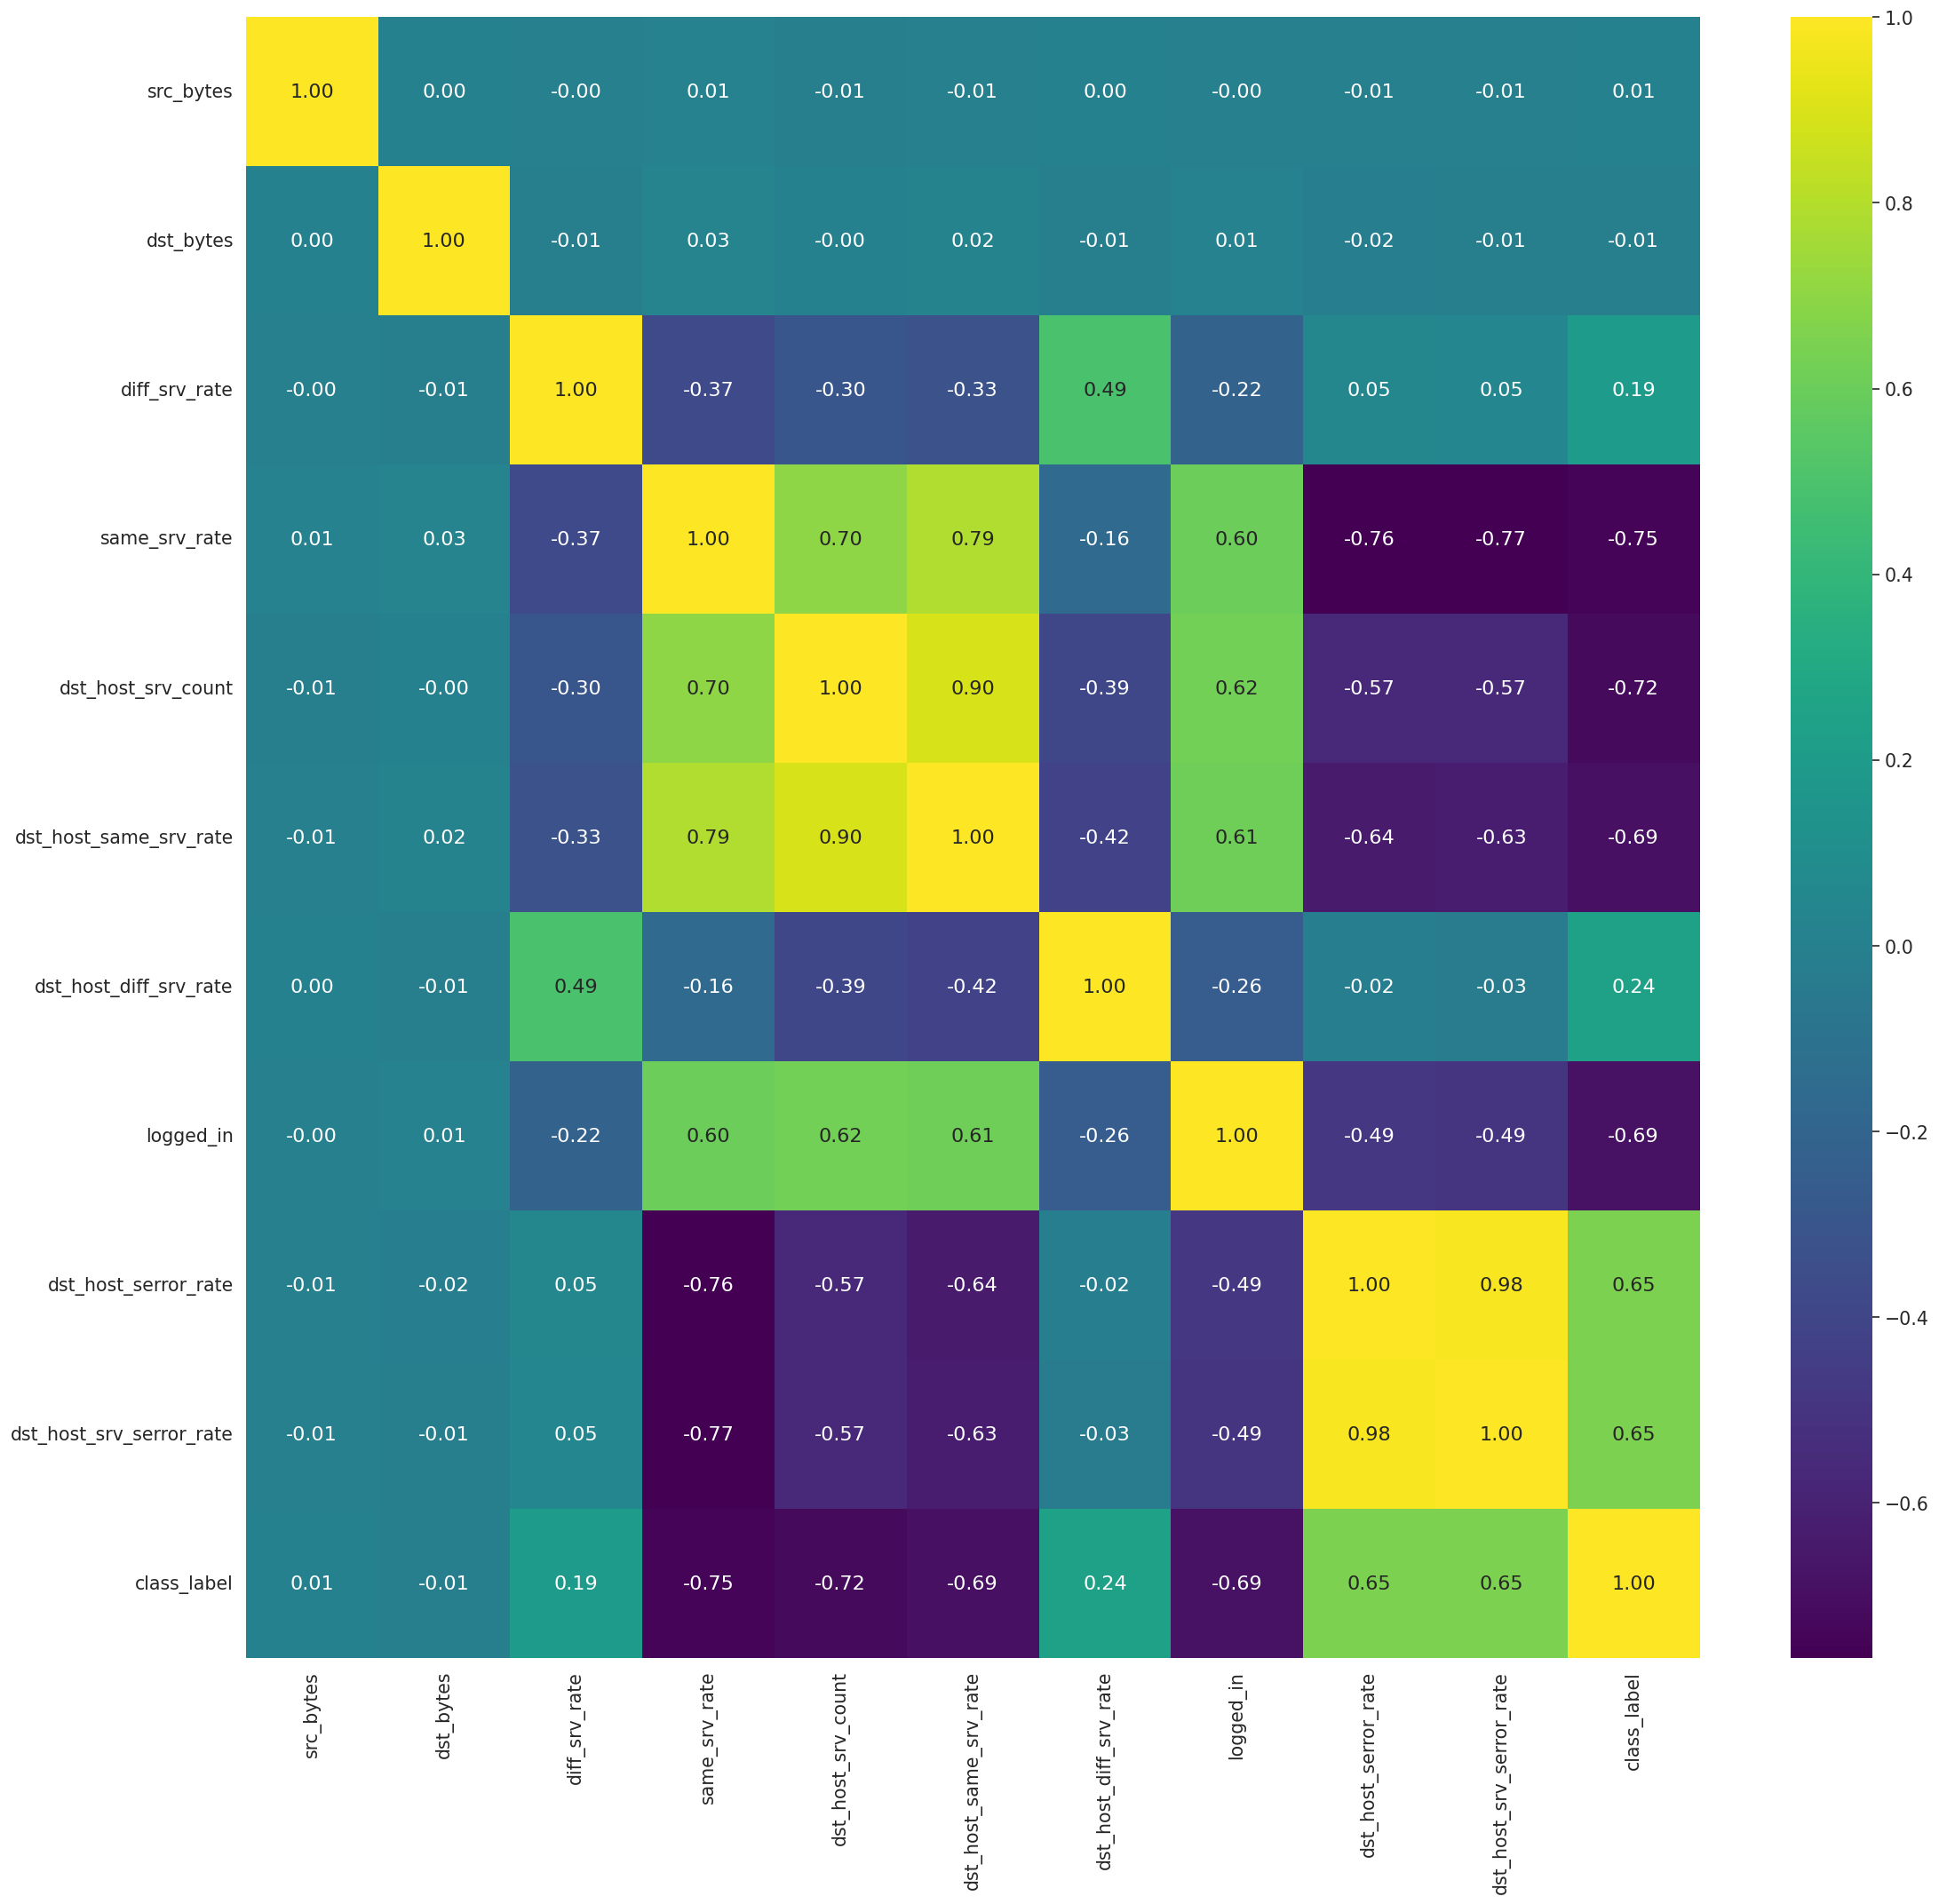

In [41]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

In [42]:
int_data_no_strings

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label,anomolous_behaviour
0,0,491,0,0,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0,0
1,0,146,0,0,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1,1
3,0,232,8153,0,0,0,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0,0
4,0,199,420,0,0,0,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1,1
25188,0,334,0,0,0,0,0,0,1,0,...,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1,1
25189,0,0,0,0,0,0,0,0,0,0,...,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1,1
25190,0,0,0,0,0,0,0,0,0,0,...,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1,1


In [43]:
X


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,anomolous_behaviour
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,0,0,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,334,0,0,0,0,0,0,1,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,0,0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [44]:
y

0        0
1        0
2        1
3        0
4        0
        ..
25187    1
25188    1
25189    1
25190    1
25191    1
Name: class_label, Length: 25192, dtype: int64

# Feature Selection using information gain

In [45]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

X = labeled_unbalanced.drop('ExpiredHospital', axis=1)  # Features
y = labeled_unbalanced['ExpiredHospital']  # Target variable

# Calculate mutual information scores
mutual_info_scores = SelectKBest(score_func=mutual_info_classif, k='all')
mutual_info_scores.fit(X, y)

# Get feature importance scores
feature_scores = mutual_info_scores.scores_

# Rank features based on importance scores
feature_ranking = sorted(list(zip(X.columns, feature_scores)), key=lambda x: x[1], reverse=True)

# Print the top 15 features with highest information gain
top_features = 15
top_feature_list = []
print(f"Top {top_features} features with highest information gain:")
for feature, score in feature_ranking[:top_features]:
  top_feature_list.append(feature)
  print(f"{feature}: {score:.4f}")

NameError: name 'labeled_unbalanced' is not defined

In [ ]:
labeled_unbalanced_fs = labeled_unbalanced[top_feature_list]
expired_hospital_column = labeled_unbalanced['ExpiredHospital']
labeled_unbalanced_fs_with_target = pd.concat([labeled_unbalanced_fs, expired_hospital_column], axis=1)

In [ ]:
labeled_unbalanced_fs_with_target

In [ ]:
testing_data_set_fs = testing_data_set[top_feature_list]
testing_data_set_fs

# Z-score Normalisation

In [ ]:
labeled_unbalanced

In [ ]:
testing_data_set

In [ ]:
# Performing a Standard scaler transform of the labeled_unbalanced dataset, i.e. z-score norm.

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

# Exculde columns
columns_to_exclude = [
    'ExpiredHospital', 'gender_F', 'gender_M', 'marital_status_DIVORCED', 'marital_status_LIFE PARTNER',
    'marital_status_MARRIED', 'marital_status_SEPARATED', 'marital_status_SINGLE',
    'marital_status_UNKNOWN (DEFAULT)', 'marital_status_WIDOWED'
]

# Create a subset of the dataset excluding the specified columns
selected_columns = [col for col in labeled_unbalanced.columns if col not in columns_to_exclude]
subset_data_train = labeled_unbalanced[selected_columns]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized data
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)

# Combine the normalized columns with the excluded columns
for col in columns_to_exclude:
    normalized_df_train[col] = labeled_unbalanced[col]

normalized_df_train.describe()

In [ ]:
# Performing a Standard scaler transform of the testing_data_set, i.e. z-score norm.

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot

# Exculde columns
columns_to_exclude = [
    'gender_F', 'gender_M', 'marital_status_DIVORCED', 'marital_status_LIFE PARTNER',
    'marital_status_MARRIED', 'marital_status_SEPARATED', 'marital_status_SINGLE',
    'marital_status_UNKNOWN (DEFAULT)', 'marital_status_WIDOWED'
]

# Create a subset of the dataset excluding the specified columns
selected_columns = [col for col in testing_data_set.columns if col not in columns_to_exclude]
subset_data_test = testing_data_set[selected_columns]

# Perform z-score normalization on the selected columns
std_scaler = StandardScaler()
normalized_data_test = std_scaler.fit_transform(subset_data_test)

# Create a DataFrame with normalized data
normalized_df_test = pd.DataFrame(normalized_data_test, columns=subset_data_test.columns)

# Combine the normalized columns with the excluded columns
for col in columns_to_exclude:
    normalized_df_test[col] = labeled_unbalanced[col]

normalized_df_test

# Noramlised and Information gain feature selection

In [ ]:
# Feature Selection With information Gain
labeled_unbalanced_fs_with_target
# Normalised
normalized_df_train

In [ ]:
# Normalised and information gain
normalized_df_train_fs = normalized_df_train[top_feature_list]
expired_hospital_column = labeled_unbalanced['ExpiredHospital']
normalized_df_train_fs = pd.concat([normalized_df_train_fs, expired_hospital_column], axis=1)
normalized_df_test_fs = normalized_df_test[top_feature_list]

# Split data - balance with SMOTE

In [ ]:
X = labeled_unbalanced_fs_with_target.drop(["ExpiredHospital"], axis=1)
y = labeled_unbalanced_fs_with_target["ExpiredHospital"]

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority', random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dfys = pd.DataFrame(y_train)
dfys.value_counts()

In [ ]:
value_counts = dfys.value_counts()
total_values = len(dfys)
percentages = (value_counts / total_values) * 100
print(percentages)

In [ ]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
dfysr = pd.DataFrame(y_train_resampled)
dfysr.value_counts()

In [ ]:
# Get the last 50 samples from the testing set for validation
future_sample_X = X_test[-50:]
future_sample_y = y_test[-50:]

# Remove the last 50 samples from the test dataset
X_test = X_test[0:-50]
y_test = y_test[0:-50]

# Decision Tree

## Hyper Parameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 8, 16]
}

# Create a decision tree classifier
DT_classifier = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


## Train Decision Tree

In [ ]:
DT_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=40,
                                       min_samples_leaf=1, min_samples_split=2)
DT_classifier.fit(X_train_resampled, y_train_resampled)

## Measure Decision Tree's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_DT = DT_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_DT)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_DT, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_DT, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_DT, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Decision Tree)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_DT)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = DT_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (DT)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = DT_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# K Nearest Neighbour

## Find best k value

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid (k values to explore)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 21, 23, 25, 27, 29, 31]}

# Create kNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Perform grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']

print("Best k value:", best_k)

## Train kNN

In [ ]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train_resampled, y_train_resampled)

## Measure kNN's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_KNN = KNN_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_KNN)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_KNN, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_KNN, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_KNN, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_DT)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (kNN)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_KNN)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = KNN_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (kNN)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = KNN_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (kNN)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = KNN_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# Random Forrest

## Hyper Parameter optimization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid to search
param_grid = {
    'criterion': ['entropy', 'gini'],
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
RF_classifier = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RF_classifier, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", best_params)


## Train Random Forrest

In [ ]:
RF_classifier = RandomForestClassifier(criterion='entropy', min_samples_leaf=1,
                                       min_samples_split=2, n_estimators=2500)
RF_classifier.fit(X_train_resampled, y_train_resampled)

### Cross Validation & KFold

In [ ]:
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(RF_classifier, X_test, y_test, cv=kf, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cross_val_results)
print("Mean Accuracy:", cross_val_results.mean())

## Measure Random Forrest's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_RF = RF_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_RF)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_RF, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_RF, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_RF, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_RF)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_RF)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Random Forest)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = RF_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (RF)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = RF_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# Support Vector Machine

## Optimize parameters - too computationally expensive

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),  # Example range for C (adjust based on your dataset)
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.1, 1],
    'class_weight': [None, 'balanced']
}

randomized_search = RandomizedSearchCV(
    estimator=SVC(probability=True),
    param_distributions=param_dist,
    n_iter=3,  # Number of parameter settings that are sampled
    cv=5,       # Number of cross-validation folds
    n_jobs=-1,   # Use all available CPU cores for parallelism
    random_state=42
)

randomized_search.fit(X_train_resampled, y_train_resampled)
best_params = randomized_search.best_params_
best_classifier = randomized_search.best_estimator_

## Train SVM

In [ ]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train_resampled, y_train_resampled)

## Measure SVM's performance

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (SVM)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_SVM)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = SVM_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (SVM)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = SVM_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# Neural Network

In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

input_dim   = X_train.shape[1]

In [ ]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print("Epoch {}: Loss - {:.4f}, Accuracy - {:.4f}".format(epoch+1, logs['loss'], logs['accuracy']))

## Hyper Parameter Tuning

In [ ]:
import kerastuner
from kerastuner.tuners import RandomSearch

epochNo = 10
batchSize = 100

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(input_dim)))
    model.add(Dense(units=hp.Int('units1', min_value=2048, max_value=4196, step=256), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate1', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units2', min_value=1024, max_value=2048, step=128), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate2', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units3', min_value=512, max_value=1024, step=64), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_rate3', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Number of hyperparameter combinations to try
    directory='my_dir',  # Directory to save optimization logs and checkpoints
    project_name='opt_2'
)

tuner.search(X_train_resampled, y_train_resampled, epochs=epochNo, batch_size=batchSize, validation_data=(X_test, y_test))

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hyperparameters_list = best_hps.values
print("Best Hyperparameters:", best_hyperparameters_list)

In [ ]:
predictions = model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1

## Using a FNN

In [ ]:
n_neurons_1   = 3328
n_neurons_2   = 2048
n_neurons_3   = 960
epochNo      =  100
batchSize = 100

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim))) # tf.keras.Input() is used to instantiate a Keras tensor.
model.add(Dense(n_neurons_1, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(n_neurons_2, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_neurons_3, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation=tf.keras.activations.sigmoid))

callbacks = [CustomCallback()]

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_resampled, y_train_resampled, epochs=epochNo, batch_size=batchSize, verbose=3, callbacks=callbacks)

predictions = model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1
scores = model.evaluate(X_test, y_test)
print('The evaluation scores are {}'.format(scores))
model.save("model.h5")
loaded_model = load_model ('model.h5')
loaded_model.summary()

## Measuring the perfomance of the FNN

In [ ]:
loaded_model = load_model ('model.h5')
predictions = loaded_model.predict(X_test)
y_preds_FNN = (predictions > 0.5)*1

In [ ]:
score_test = accuracy_score(y_test, y_preds_FNN)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_preds_FNN, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_preds_FNN, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_preds_FNN, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_preds_FNN)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (FNN)")
plt.show()

In [ ]:
report = classification_report(y_test, y_preds_FNN)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of the positive class (class 1) using the predict method.
y_probs = predictions
# The predicted probabilities for class 1 are already in y_probs.
# Calculate ROC curve and AUC.
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

print('The AUC is {:.3f}'.format(auc))

# Plot ROC curve.
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (FNN)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get probabilities from the model
predictions = loaded_model.predict(X_test)

# Ensure predictions is a 2D array with shape (n_samples, n_classes)
if predictions.shape[1] == 1:
    # If predictions have only one column, assume binary classification and create a 2D array
    positive_probs = predictions[:, 0]  # Probabilities for the positive class
    negative_probs = 1 - positive_probs  # Probabilities for the negative class
else:
    # If predictions already have multiple columns, assume they represent probabilities for each class
    positive_probs = predictions[:, 1]  # Probabilities for the positive class
    negative_probs = predictions[:, 0]  # Probabilities for the negative class

# Calculate ROC curve and AUC score for positive class
fpr_positive, tpr_positive, _ = roc_curve(y_test, positive_probs, pos_label=1)
auc_positive = roc_auc_score(y_test, positive_probs)

# Calculate ROC curve and AUC score for negative class
fpr_negative, tpr_negative, _ = roc_curve(y_test, negative_probs, pos_label=0)
auc_negative = roc_auc_score(y_test, negative_probs)

# Plot ROC curves for both positive and negative classes on the same graph
plt.figure()
lw = 2
plt.plot(fpr_positive, tpr_positive, color='darkorange', lw=lw, label='Class 0')
plt.plot(fpr_negative, tpr_negative, color='green', lw=lw, label='Class 1')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Measuring performance on small unseen set

In [ ]:
predictions_val = loaded_model.predict(future_sample_X)
y_preds_val = (predictions_val > 0.5)*1     # threshold is 0.5
loss, accuracy = model.evaluate(future_sample_X, future_sample_y)
print('Loss: %.4f, Accuracy: %.2f%%' % (loss, accuracy*100))

# Naive Bayes - Gaussian

## Hyper parameter optimisation

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Create a Gaussian Naive Bayes classifier
GNB_classifier = GaussianNB()

# Instantiate GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=GNB_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

## Train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
GNB_classifier = GaussianNB()
GNB_classifier.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_GNB = GNB_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_GNB)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_GNB, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_GNB, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_GNB, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_GNB)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (GNB)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_GNB)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = GNB_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (GNB)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = GNB_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# Quadratic Discrimination Analysis

## Hyper parameter optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Define the parameter grid to search
param_grid = {
    'reg_param': [0.1, 0.01, 0.001, 0.0001]  # Regularization parameter to avoid singular matrices
}

# Create a Quadratic Discriminant Analysis classifier
QDA_classifier = QuadraticDiscriminantAnalysis()

# Instantiate GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=QDA_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

## Train QDA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
QDA_classifier = QuadraticDiscriminantAnalysis(reg_param = 0.1)
QDA_classifier.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_QDA = QDA_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_QDA)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_QDA, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_QDA, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_QDA, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_QDA)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (QDA)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_QDA)
print(report)

## ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = QDA_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (QDA)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = QDA_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (QDA)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = QDA_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# MLP Classifier

## Hyper parameter optimisation

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Define the parameter grid to search
param_grid = {
    'hidden_layer_sizes': [(5, 2), (10, 5), (20, 10)],  # Different combinations of hidden layer sizes
    'alpha': [1e-5, 1e-4, 1e-3],  # Regularization parameter
    'solver': ['lbfgs', 'sgd', 'adam']  # Optimization algorithm
}

# Create an MLPClassifier
MLP_classifier = MLPClassifier(random_state=1)

# Instantiate GridSearchCV with the classifier, parameter grid, and cross-validation strategy
grid_search = GridSearchCV(estimator=MLP_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Accuracy Score: ", grid_search.best_score_)

## Training

In [ ]:
from sklearn.neural_network import MLPClassifier
MLP_classifier = MLPClassifier(solver='adam', alpha= 0.001, hidden_layer_sizes=(400, 200), random_state=1)
MLP_classifier.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Predict the class labels of samples in the test dataset
y_pred_MLP = MLP_classifier.predict(X_test)

In [ ]:
score_test = accuracy_score(y_test, y_pred_MLP)
print (score_test)

In [ ]:
precision_test = precision_score(y_test, y_pred_MLP, average='macro')
print (precision_test)

In [ ]:
recall_test = recall_score(y_test, y_pred_MLP, average='macro')
print (recall_test)

In [ ]:
f1_test =  f1_score(y_test, y_pred_MLP, average='macro')
print(f1_test)

In [ ]:
mat = confusion_matrix(y_test, y_pred_MLP)
class_names = ["Not Expired", "Expired"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (MLP)")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred_MLP)
print(report)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probabilities of each class.
y_probs = MLP_classifier.predict_proba(X_test)

# The 'positive' class value is 1, so we want the probabilities of the class being 1.
# i.e., the second column of the array.
y_probs_class_1 = y_probs[:,1]

auc = roc_auc_score(y_test, y_probs_class_1)
print('The AUC is {:.3f}'.format(auc)) # uses string formatting to get 3 decimal places.

fpr, tpr, thresholds = roc_curve(y_test, y_probs_class_1, pos_label=1)

print("Threshold\tTPR vs FPR")
for f, p, t in zip(fpr, tpr, thresholds):
    print("{:.3f}\t{:.3f} vs {:.3f}".format(t, p, f))

# Here is some code to plot the ROC curve.
# Follows the example at https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

import matplotlib.pyplot as plt
plt.figure()
lw = 2 # the line width
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--') # The dashed line for random choice
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the probabilities of each class.
y_probs = MLP_classifier.predict_proba(X_test)

# Initialize lists to store TPR and FPR for each class
tpr_list = []
fpr_list = []

# Convert multi-class labels to binary labels for each class and calculate ROC curves
for pos in range(2):
    binary_labels = (y_test == pos).astype(int)
    fpr, tpr, thresholds = roc_curve(binary_labels, y_probs[:, pos], pos_label=1)
    auc = roc_auc_score(binary_labels, y_probs[:, pos])

    # Store TPR and FPR for plotting
    tpr_list.append(tpr)
    fpr_list.append(fpr)

# Plot ROC curves for all classes on the same graph
plt.figure()
lw = 2
colors = ['darkorange', 'green']
labels = ['Class 0', 'Class 1']

for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], color=colors[i], lw=lw, label='ROC curve - %s' % (labels[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (MLP)')
plt.legend(loc="lower right")
plt.show()

## Measuring performance on small unseen set

In [ ]:
solution_validate = MLP_classifier.predict(future_sample_X)

In [ ]:
score_validate = accuracy_score(future_sample_y, solution_validate)
print (score_validate)

# Run Classifiers

In [ ]:
# # DT
# DT_predictions = DT_classifier.predict(testing_data_set)
# DT_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': DT_predictions})

# # kNN
# KNN_predictions = KNN_classifier.predict(testing_data_set)
# KNN_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': KNN_predictions})

# RF
RF_predictions = RF_classifier.predict(testing_data_set_fs)
RF_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': RF_predictions})

# # # SVM
# SVM_predictions = SVM_classifier.predict(testing_data_set)
# SVM_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': SVM_predictions})

In [ ]:
# FNN
FNN_predictions = loaded_model.predict(testing_data_set)
FNN_predictions_flat = np.array(FNN_predictions).flatten()

# Apply threshold to convert probabilities to binary predictions
threshold = 0.5
binary_predictions = (FNN_predictions_flat > threshold).astype(int)

# Create a dataframe for binary predictions
FNN_predictions_df = pd.DataFrame({'Predicted-ExpiredHospital': binary_predictions})

In [ ]:
DT_predictions_df

In [ ]:
DT_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(DT_predictions_df))]
DT_predictions_df = DT_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
DT_predictions_df

In [ ]:
KNN_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(KNN_predictions_df))]
KNN_predictions_df = KNN_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
KNN_predictions_df

In [ ]:
RF_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(RF_predictions_df))]
RF_predictions_df = RF_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
RF_predictions_df

In [ ]:
SVM_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(SVM_predictions_df))]
SVM_predictions_df = SVM_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
SVM_predictions_df

In [ ]:
FNN_predictions_df['row ID'] = ['Row' + str(i) for i in range(len(FNN_predictions_df))]
FNN_predictions_df = FNN_predictions_df[['row ID', 'Predicted-ExpiredHospital']]
FNN_predictions_df

## Turn Prediction Dataframes into CSV files

In [ ]:
# DT_predictions_df.to_csv('DT.csv', index=False)
# KNN_predictions_df.to_csv('KNN.csv', index=False)
RF_predictions_df.to_csv('RF.csv', index=False)
# SVM_predictions_df.to_csv('SVM.csv', index=False)
# FNN_predictions_df.to_csv('FNN.csv', index=False)